In [1]:
install.packages("rstan", repos = "https://cloud.r-project.org/", dependencies=TRUE)


The downloaded binary packages are in
	/var/folders/nj/mmt3l4jn1_zgg7b7ft_hk4nc0000gq/T//RtmpWlgeuY/downloaded_packages


In [14]:
library(dplyr)
library(rstan)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
: package ‘rstan’ was built under R version 3.2.5Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4Loading required package: StanHeaders
Warning message:
: package ‘StanHeaders’ was built under R version 3.2.5rstan (Version 2.12.1, packaged: 2016-09-11 13:07:50 UTC, GitRev: 85f7a56811da)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [15]:
library(lubridate)

In [6]:
## read in the data
rDat <- read.table("learn_data/gibsonwu2012data.txt", header=TRUE)

In [7]:
# head(rDat)
rDat <- mutate(rDat, so=ifelse(rDat$type == "obj-ext", 1, -1))

In [8]:
head(rDat)

,subj,item,type,pos,word,correct,rt,region,type2,so
1,1,13,obj-ext,6,抓住,-,1140,de1,object relative,1
2,1,6,subj-ext,6,男孩,-,1197,de1,subject relative,-1
3,1,5,obj-ext,6,撞,-,756,de1,object relative,1
4,1,9,obj-ext,6,監視,-,643,de1,object relative,1
5,1,14,subj-ext,6,機師,-,860,de1,subject relative,-1
6,1,4,subj-ext,6,男孩,-,868,de1,subject relative,-1


In [9]:
rDat <- subset(rDat, region=="headnoun")

In [10]:
stanDat <- list(rt = rDat$rt, so=rDat$so, N=nrow(rDat))

In [11]:
head(stanDat)

$rt
  [1] 1561  959  582  294  438  286  438  278  542  494  270  406  374  286  246
 [16]  398 1280 5006  373  813  603  574  349  382  366  362  430  286  270  302
 [31]  686  626 1328  580 6217 1019  714 1136  642 2308  717  641 1361  552  742
 [46]  976  582  334 1360  422 1128  526  502  497  695  302 1015  350 1641  494
 [61]  551  472  616  387  385  342  238  607  263  287  678  263  313  294  252
 [76] 1373  353  335  725  355  910  395  340  335  442 1072  350  300  433  270
 [91]  597  635  420  483  391  676  878  424  337  494  531  897  417  383  345
[106]  302  318  510 4649 1344  639  454  310  486  310  318  294  301  238  254
[121]  265  208  189  224  241  251  202  243  179  172  191  194 1652  196  199
[136]  414  847  230  390  550  342  373  254  582  278  389  262  318  286  734
[151] 1384  253  274  238  330 1048  243  255  437  254  265  207  259  243  197
[166]  245  807 1112  334  319  823  302  253  246  221  262  301  246  288  253
[181] 4383  342  611  559  493  508  415  303 3796  352 1483  594  291  702  340
[196]  807  639  374  446 1248 2507  534  349  630  406  270  454 1079  366  213
[211]  741  306  349  987  670  444  513  309  572  706 3145  576  650  370  555
[226]  470  470  358  318  582  326  438  534  542  422  358  374  310  366  350
[241]  360 1060  515  280  367  683  944 1096 1048  470  526  302  230  246  302
[256]  326  382  254 2988  453  406  358  374  374  245  285  318  350  213  285
[271]  246  326  454  278  189  189  206  445 1136  312  303  322  291  454  352
[286]  314  313  269  349  283 1860 1053  372  349  290  334  482  573  437  302
[301]  451  516  539  285  281  554  279  406  366  414  302  438  254  470  286
[316]  430  246 3285  286  278  374  214  369  361  240  252  345  220  333  244
[331]  250  299  230  324  275  200  263  767  237  254  221  214  799  270  221
[346]  205  707  294  309  302  254  246  287  369  367  331  343  379  726  322
[361]  292  478  298  366  257  435  270  318  366  294  534  245 1008 1056  695
[376]  294  408  398  310  294  294  293  560  969  314 2366  399  515  332 1275
[391]  295  377  274  250  267  243  222  935 1585 1280 2676  695  831  791  550
[406]  470  422  518  454  526  543  614  318  278  493  622  238  262  286  324
[421]  238  254  302  300  230  262  686  374  302  206  445  278  214  230 2053
[436]  182  430  222  206  462  270 3814  310 1753  478  334  296  245  246 1449
[451]  301  340  318  270  198  205  197  462  422  421  461  390  294 1509  358
[466]  318  356 1262  318  438  278  390  431 2071  278  387  624  583  390  450
[481] 1421 1859  402  377  495  282  279  299  414 1003  322  355  841  344  629
[496]  526  339  369  621  218  244  193 1609  647  374  679  342  318  326  254
[511]  334  960  430  286  309  438  270  282  729  522 1635  422 1396  299  274
[526]  350  302  327  305  429  217  344 1376  903  390  358  382  398  342  334
[541]  470  374  406  342  478  510  350

$so
  [1]  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1
 [26]  1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1
 [51] -1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1
 [76]  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1
[101]  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1  1
[126] -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1
[151]  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1
[176]  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1
[201] -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1
[226]  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1
[251] -1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1
[276] -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1
[301] -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1  1

In [19]:
fixEffit <- stan(file="BayesLMMTutorial-master/vignettes/fixEf.stan", data=stanDat,
                iter=2000, chains=4)

In file included from file1fc329859762.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:42:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/stan/math/rev/core/set_zero_all_adjoints.hpp:14:17: warning: unused function 'set_zero_all_adjoints' [-Wunused-function]
    static void set_zero_all_adjoints() {
                ^
In file included from file1fc329859762.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/StanHeaders/include/src/stan/model/

The following numerical problems occured the indicated number of times after warmup on chain 1
                                                                                        count
Exception thrown at line 16: lognormal_log: Scale parameter is inf, but must be finite!     8
When a numerical problem occurs, the Hamiltonian proposal gets rejected.
See http://mc-stan.org/misc/warnings.html#exception-hamiltonian-proposal-rejected
If the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'fixEf' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 2, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 2, Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 2, Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 2, Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 2, Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 2, Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 2, Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 2, Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 2, Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 2, Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 2, Iteration: 2000 / 2000 [100%]  (Sampling)
 Elapsed Time: 0.224236 seconds (Warm-up)
               0.197238 seconds (Sampling)
               0.421474 seconds (Total)



The following numerical problems occured the indicated number of times after warmup on chain 2
                                                                                        count
Exception thrown at line 16: lognormal_log: Scale parameter is inf, but must be finite!    12
When a numerical problem occurs, the Hamiltonian proposal gets rejected.
See http://mc-stan.org/misc/warnings.html#exception-hamiltonian-proposal-rejected
If the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'fixEf' NOW (CHAIN 3).

Chain 3, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 3, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 3, Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 3, Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 3, Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 3, Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 3, Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 3, Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 3, Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 3, Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 3, Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 3, Iteration: 2000 / 2000 [100%]  (Sampling)
 Elapsed Time: 0.19611 seconds (Warm-up)
               0.212962 seconds (Sampling)
               0.409072 seconds (Total)



The following numerical problems occured the indicated number of times after warmup on chain 3
                                                                                        count
Exception thrown at line 16: lognormal_log: Scale parameter is inf, but must be finite!     7
When a numerical problem occurs, the Hamiltonian proposal gets rejected.
See http://mc-stan.org/misc/warnings.html#exception-hamiltonian-proposal-rejected
If the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'fixEf' NOW (CHAIN 4).

Chain 4, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 4, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 4, Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 4, Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 4, Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 4, Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 4, Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 4, Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 4, Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 4, Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 4, Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 4, Iteration: 2000 / 2000 [100%]  (Sampling)
 Elapsed Time: 0.209303 seconds (Warm-up)
               0.239864 seconds (Sampling)
               0.449167 seconds (Total)



The following numerical problems occured the indicated number of times after warmup on chain 4
                                                                                   count
Exception thrown at line 16: lognormal_log: Scale parameter is 0, but must be > 0!     1
When a numerical problem occurs, the Hamiltonian proposal gets rejected.
See http://mc-stan.org/misc/warnings.html#exception-hamiltonian-proposal-rejected
If the number in the 'count' column is small, do not ask about this message on stan-users.


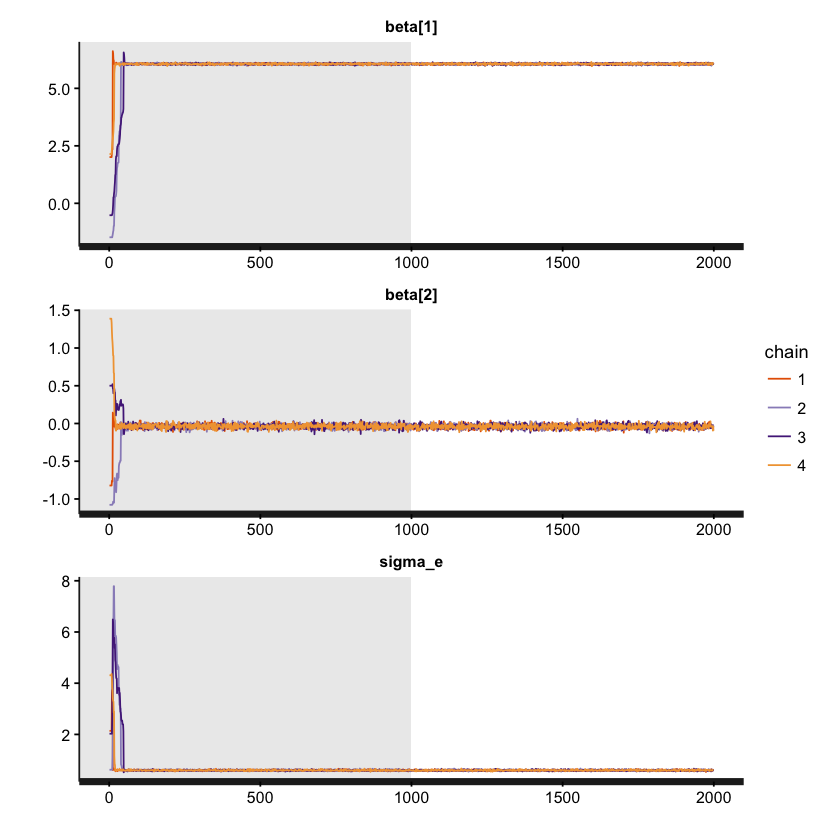

In [20]:
traceplot(fixEffit, pars=c("beta", "sigma_e"), inc_warmup = TRUE, nrow=3)

In [46]:
## examine quantiles of posterior distrubutions:
print( fixEffit , pars = c("beta","sigma_e") ,
       probs = c(0.025,0.5,0.975))

Inference for Stan model: fixEf.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd  2.5%   50% 97.5% n_eff Rhat
beta[1]  6.06       0 0.02  6.01  6.06  6.11  3058    1
beta[2] -0.04       0 0.02 -0.09 -0.04  0.01  2862    1
sigma_e  0.60       0 0.02  0.57  0.60  0.63  3009    1

Samples were drawn using NUTS(diag_e) at Sun Oct 30 17:21:04 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [50]:
## examine quantiles of parameter of interest
beta1 <- extract(fixEffit, pars=c("beta[2]") )$beta
print(signif(quantile(beta1, probs=c(0.025, 0.5, 0.975))
            ,2))

  2.5%    50%  97.5% 
-0.088 -0.039  0.010 


In [24]:
tail(ps)

,X,Y,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,ellip.h,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,Precinct
660692,-73.91966,40.81352,2011,40,17556,12312011,2355,1,O,P,⋯,40,I,11,NA,1006489,235674,CM,1,46,40
660693,-73.87625,40.74844,2011,115,18291,12312011,2355,1,O,P,⋯,115,H,,NA,1018538,211977,CM,1,20,110
660694,-73.95,40.7921,2011,23,17949,12312011,2358,1,O,H,⋯,23,C,,NA,998096,227863,CM,1,20,23
660695,-73.91805,40.80958,2011,40,17559,12312011,2358,1,O,P,⋯,40,C,14,NA,1006936,234238,CM,1,20,40
660696,-73.91805,40.80958,2011,40,17555,12312011,2358,1,O,P,⋯,40,C,14,NA,1006936,234238,CM,1,20,40
660697,-73.95,40.7921,2011,23,17948,12312011,2358,1,O,H,⋯,23,C,,NA,998096,227863,CM,1,20,23


In [3]:
blocks = read.csv('./data//NYC_Blocks_2010CensusData_Plus_Precincts.csv')
head(blocks)

,geoid10,precinct,SUMLEV,STATE,COUNTY,TRACT,BLOCK,INTPTLAT,INTPTLON,P0010001,ellip.h,geometry,geometry_vertex_count,SHAPE_Leng,SHAPE_Area,import_notes,Precinct,SHAPE_Leng.1,SHAPE_Area.1,import_notes.1,precinct.1
1,3.6005e+14,NA,750,36,5,100,1,40.79311,-73.86966,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,3.6005e+14,NA,750,36,5,100,2,40.79811,-73.89236,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3.6005e+14,114,750,36,5,100,1000,40.79439,-73.8808,8634,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,114
4,3.6005e+14,114,750,36,5,100,1001,40.79714,-73.88712,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,114
5,3.6005e+14,114,750,36,5,100,1002,40.79221,-73.88205,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,114
6,3.6005e+14,114,750,36,5,100,1003,40.78962,-73.87964,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,114


In [4]:
colnames(blocks)

[1] "geoid10"               "precinct"              "SUMLEV"               
  [4] "STATE"                 "COUNTY"                "TRACT"                
  [7] "BLOCK"                 "INTPTLAT"              "INTPTLON"             
 [10] "P0010001"              "P0010002"              "P0010003"             
 [13] "P0010004"              "P0010005"              "P0010006"             
 [16] "P0010007"              "P0010008"              "P0010009"             
 [19] "P0010010"              "P0010011"              "P0010012"             
 [22] "P0010013"              "P0010014"              "P0010015"             
 [25] "P0010016"              "P0010017"              "P0010018"             
 [28] "P0010019"              "P0010020"              "P0010021"             
 [31] "P0010022"              "P0010023"              "P0010024"             
 [34] "P0010025"              "P0010026"              "P0010027"             
 [37] "P0010028"              "P0010029"              "P0010030"             
 [40] "P0010031"              "P0010032"              "P0010033"             
 [43] "P0010034"              "P0010035"              "P0010036"             
 [46] "P0010037"              "P0010038"              "P0010039"             
 [49] "P0010040"              "P0010041"              "P0010042"             
 [52] "P0010043"              "P0010044"              "P0010045"             
 [55] "P0010046"              "P0010047"              "P0010048"             
 [58] "P0010049"              "P0010050"              "P0010051"             
 [61] "P0010052"              "P0010053"              "P0010054"             
 [64] "P0010055"              "P0010056"              "P0010057"             
 [67] "P0010058"              "P0010059"              "P0010060"             
 [70] "P0010061"              "P0010062"              "P0010063"             
 [73] "P0010064"              "P0010065"              "P0010066"             
 [76] "P0010067"              "P0010068"              "P0010069"             
 [79] "P0010070"              "P0010071"              "P0020001"             
 [82] "P0020002"              "P0020003"              "P0020004"             
 [85] "P0020005"              "P0020006"              "P0020007"             
 [88] "P0020008"              "P0020009"              "P0020010"             
 [91] "P0020011"              "P0020012"              "P0020013"             
 [94] "P0020014"              "P0020015"              "P0020016"             
 [97] "P0020017"              "P0020018"              "P0020019"             
[100] "P0020020"              "P0020021"              "P0020022"             
[103] "P0020023"              "P0020024"              "P0020025"             
[106] "P0020026"              "P0020027"              "P0020028"             
[109] "P0020029"              "P0020030"              "P0020031"             
[112] "P0020032"              "P0020033"              "P0020034"             
[115] "P0020035"              "P0020036"              "P0020037"             
[118] "P0020038"              "P0020039"              "P0020040"             
[121] "P0020041"              "P0020042"              "P0020043"             
[124] "P0020044"              "P0020045"              "P0020046"             
[127] "P0020047"              "P0020048"              "P0020049"             
[130] "P0020050"              "P0020051"              "P0020052"             
[133] "P0020053"              "P0020054"              "P0020055"             
[136] "P0020056"              "P0020057"              "P0020058"             
[139] "P0020059"              "P0020060"              "P0020061"             
[142] "P0020062"              "P0020063"              "P0020064"             
[145] "P0020065"              "P0020066"              "P0020067"             
[148] "P0020068"              "P0020069"              "P0020070"             
[151] "P0020071"              "P0020072"              "P0020073"             
[154] "geometry"        

In [3]:
colnames(ps)

[1] "X"        "Y"        "year"     "pct"      "ser_num"  "datestop"
  [7] "timestop" "recstat"  "inout"    "trhsloc"  "perobs"   "crimsusp"
 [13] "perstop"  "typeofid" "explnstp" "othpers"  "arstmade" "arstoffn"
 [19] "sumissue" "sumoffen" "compyear" "comppct"  "offunif"  "officrid"
 [25] "frisked"  "searched" "contrabn" "adtlrept" "pistol"   "riflshot"
 [31] "asltweap" "knifcuti" "machgun"  "othrweap" "pf_hands" "pf_wall" 
 [37] "pf_grnd"  "pf_drwep" "pf_ptwep" "pf_baton" "pf_hcuff" "pf_pepsp"
 [43] "pf_other" "radio"    "ac_rept"  "ac_inves" "rf_vcrim" "rf_othsw"
 [49] "ac_proxm" "rf_attir" "cs_objcs" "cs_descr" "cs_casng" "cs_lkout"
 [55] "rf_vcact" "cs_cloth" "cs_drgtr" "ac_evasv" "ac_assoc" "cs_furtv"
 [61] "rf_rfcmp" "ac_cgdir" "rf_verbl" "cs_vcrim" "cs_bulge" "cs_other"
 [67] "ac_incid" "ac_time"  "rf_knowl" "ac_stsnd" "ac_other" "sb_hdobj"
 [73] "sb_outln" "sb_admis" "sb_other" "repcmd"   "revcmd"   "rf_furt" 
 [79] "rf_bulg"  "offverb"  "offshld"  "forceuse" "sex"      "race"    
 [85] "dob"      "age"      "ht_feet"  "ht_inch"  "weight"   "haircolr"
 [91] "eyecolor" "build"    "othfeatr" "addrtyp"  "rescode"  "premtype"
 [97] "premname" "addrnum"  "stname"   "stinter"  "crossst"  "aptnum"  
[103] "city"     "state"    "zip"      "addrpct"  "sector"   "beat"    
[109] "post"     "xcoord"   "ycoord"   "dettypcm" "linecm"   "detailcm"
[115] "Precinct"

In [4]:
table(ps$frisked)


     N      Y 
291876 368821 

In [5]:
table(ps$searched)


     N      Y 
604483  56214 

In [5]:
ps = read.csv('./data/Stops2011WithPrecinct.csv')
head(ps)

,X,Y,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,ellip.h,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,Precinct
1,-73.83245,40.69955,2011,102,185,1012011,0,A,O,P,⋯,102,B,,NA,1030708,194185,CM,1,14,102
2,-73.86627,40.75278,2011,115,50,1012011,5,A,O,P,⋯,115,I,,NA,1021302,213563,CM,1,85,115
3,-73.80767,40.58797,2011,100,4,1012011,7,1,O,H,⋯,100,B,4,34,1037668,153549,CM,1,20,100
4,-73.80767,40.58797,2011,100,3,1012011,7,1,O,H,⋯,100,B,4,34,1037668,153549,CM,1,20,100
5,-73.80767,40.58797,2011,100,1,1012011,7,1,O,H,⋯,100,B,4,34,1037668,153549,CM,1,20,100
6,-73.80767,40.58797,2011,100,2,1012011,7,1,O,H,⋯,100,B,4,34,1037668,153549,CM,1,20,100


In [6]:
# get the mapping column names that we need to fit the model
threshold_test_colnames <- c('pct','sex','age','race','datestop','timestop','searched','contrabn','riflshot',
                             'asltweap','pistol','knifcuti')

colnames(ps)

[1] "X"        "Y"        "year"     "pct"      "ser_num"  "datestop"
  [7] "timestop" "recstat"  "inout"    "trhsloc"  "perobs"   "crimsusp"
 [13] "perstop"  "typeofid" "explnstp" "othpers"  "arstmade" "arstoffn"
 [19] "sumissue" "sumoffen" "compyear" "comppct"  "offunif"  "officrid"
 [25] "frisked"  "searched" "contrabn" "adtlrept" "pistol"   "riflshot"
 [31] "asltweap" "knifcuti" "machgun"  "othrweap" "pf_hands" "pf_wall" 
 [37] "pf_grnd"  "pf_drwep" "pf_ptwep" "pf_baton" "pf_hcuff" "pf_pepsp"
 [43] "pf_other" "radio"    "ac_rept"  "ac_inves" "rf_vcrim" "rf_othsw"
 [49] "ac_proxm" "rf_attir" "cs_objcs" "cs_descr" "cs_casng" "cs_lkout"
 [55] "rf_vcact" "cs_cloth" "cs_drgtr" "ac_evasv" "ac_assoc" "cs_furtv"
 [61] "rf_rfcmp" "ac_cgdir" "rf_verbl" "cs_vcrim" "cs_bulge" "cs_other"
 [67] "ac_incid" "ac_time"  "rf_knowl" "ac_stsnd" "ac_other" "sb_hdobj"
 [73] "sb_outln" "sb_admis" "sb_other" "repcmd"   "revcmd"   "rf_furt" 
 [79] "rf_bulg"  "offverb"  "offshld"  "forceuse" "sex"      "race"    
 [85] "dob"      "age"      "ht_feet"  "ht_inch"  "weight"   "haircolr"
 [91] "eyecolor" "build"    "othfeatr" "addrtyp"  "rescode"  "premtype"
 [97] "premname" "addrnum"  "stname"   "stinter"  "crossst"  "aptnum"  
[103] "city"     "state"    "zip"      "addrpct"  "sector"   "beat"    
[109] "post"     "xcoord"   "ycoord"   "dettypcm" "linecm"   "detailcm"
[115] "Precinct"

In [5]:
# 'police_department' 'gender' 'age' 'race' 'stop_date' 'stop_time' 'search_conducted' 'contraband_found' 
# 'money' 'weapon' 'alcohol' 'drugs'

In [51]:
# init ps2
ps2 <- ps[threshold_test_colnames]

In [52]:
table(ps2$race)


     A      B      I      P      Q      U      W      Z 
 23000 339094   2771  46641 168887   5501  58493  16310 

In [53]:
# aggregate hispanics
ps2$race[ps2$race == "P"] <- "Q"

# remove race that are too minor
ps2 <- ps2[(ps2$race == "A" | ps2$race == "B" | ps2$race == "Q" | ps2$race == "W"),]
dim(ps2)

[1] 636115     12

In [54]:
str(ps2)

'data.frame':	636115 obs. of  12 variables:
 $ pct     : int  102 115 100 100 100 100 101 70 73 52 ...
 $ sex     : Factor w/ 3 levels "F","M","Z": 2 2 2 2 2 2 2 2 2 2 ...
 $ age     : int  21 15 17 17 20 17 16 19 35 20 ...
 $ race    : Factor w/ 8 levels "A","B","I","P",..: 1 2 2 2 2 2 2 2 2 5 ...
 $ datestop: int  1012011 1012011 1012011 1012011 1012011 1012011 1012011 1012011 1012011 1012011 ...
 $ timestop: int  0 5 7 7 7 7 10 10 10 15 ...
 $ searched: Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ contrabn: Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ riflshot: Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ asltweap: Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ pistol  : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ knifcuti: Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...


In [55]:
# update column names
colnames(ps2) <- c('police_department','gender','age','race','stop_date','stop_time','search_conducted','contraband_found'
                   ,'money','weapon','alcohol','drugs')
head(ps2)

,police_department,gender,age,race,stop_date,stop_time,search_conducted,contraband_found,money,weapon,alcohol,drugs
1,102,M,21,A,1012011,0,N,N,N,N,N,N
2,115,M,15,B,1012011,5,N,N,N,N,N,N
3,100,M,17,B,1012011,7,N,N,N,N,N,N
4,100,M,17,B,1012011,7,N,N,N,N,N,N
5,100,M,20,B,1012011,7,N,N,N,N,N,N
6,100,M,17,B,1012011,7,N,N,N,N,N,N


In [56]:
# update column data types to fit the model
ps2$contraband_found <- ifelse(ps2$contraband_found == "Y", 1, 0)
ps2$search_conducted <- ifelse(ps2$search_conducted == "Y", 1, 0)
ps2$money <- ifelse(ps2$money == "Y", 1, 0)
ps2$weapon <- ifelse(ps2$weapon == "Y", 1, 0)
ps2$alcohol <- ifelse(ps2$alcohol == "Y", 1, 0)
ps2$drugs <- ifelse(ps2$drugs == "Y", 1, 0)

ps2$contraband_found <- as.logical(ps2$contraband_found)
ps2$search_conducted <- as.logical(ps2$search_conducted)
ps2$money <- as.logical(ps2$money)
ps2$weapon <- as.logical(ps2$weapon)
ps2$alcohol <- as.logical(ps2$alcohol)
ps2$drugs <- as.logical(ps2$drugs)

ps2$stop_time = as.character(ps2$stop_time)
ps2$stop_date = as.Date( mdy(ps2$stop_date))

# remove unknown gender
ps2 <- ps2[(ps2$gender == "F" | ps2$gender == "M"), ]

# remove people older than dataset
# 116 is the oldest person ever to live in the states, or at least that's the criteria we want to filter out
ps2 <- ps2[ps2$age<=116,]

# remove data that found contraband on unsearched people
ps2 <- ps2[!(ps2$search_conducted==FALSE & ps2$contraband_found==TRUE),]

# refactor the data.frame
# ps2 <- as.data.frame(lapply(ps2, function (x) if (is.factor(x)) factor(x) else x)) 
    
# make police dept. a string column again
ps2$police_department <- as.character(ps2$police_department)

In [57]:
str(ps2)

'data.frame':	626898 obs. of  12 variables:
 $ police_department: chr  "102" "115" "100" "100" ...
 $ gender           : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ age              : int  21 15 17 17 20 17 16 19 35 20 ...
 $ race             : Factor w/ 4 levels "A","B","Q","W": 1 2 2 2 2 2 2 2 2 3 ...
 $ stop_date        : Date, format: "2011-01-01" "2011-01-01" ...
 $ stop_time        : Factor w/ 1440 levels "0","1","10","100",..: 1 1126 1258 1258 1258 1258 3 3 3 358 ...
 $ search_conducted : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ contraband_found : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ money            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ weapon           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ alcohol          : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ drugs            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


In [58]:
levels(ps2$gender)

[1] "F" "M"

In [59]:
levels(ps2$gender)[1] = "Female"
levels(ps2$gender)[2] = "Male"

In [60]:
levels(ps2$race)

[1] "A" "B" "Q" "W"

In [61]:
levels(ps2$race)[1] = "Asian"
levels(ps2$race)[2] = "Black"
levels(ps2$race)[3] = "Hispanic"
levels(ps2$race)[4] = "White"

In [62]:
levels(ps2$race)

[1] "Asian"    "Black"    "Hispanic" "White"

In [74]:
ps2$race <- factor(ps2$race, levels = c('White','Black','Hispanic','Asian'))

In [64]:
levels(ps2$race)

[1] "White"    "Black"    "Hispanic" "Asian"

In [76]:
str(ps2)

'data.frame':	626898 obs. of  12 variables:
 $ police_department: chr  "102" "115" "100" "100" ...
 $ gender           : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ age              : int  21 15 17 17 20 17 16 19 35 20 ...
 $ race             : Factor w/ 4 levels "White","Black",..: 4 2 2 2 2 2 2 2 2 3 ...
 $ stop_date        : Date, format: "2011-01-01" "2011-01-01" ...
 $ stop_time        : chr  "0" "5" "7" "7" ...
 $ search_conducted : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ contraband_found : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ money            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ weapon           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ alcohol          : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ drugs            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


In [75]:
summary(ps2)

 police_department     gender            age               race       
 Length:626898      Female: 43096   Min.   :  0.00   White   : 57647  
 Class :character   Male  :583802   1st Qu.: 19.00   Black   :334277  
 Mode  :character                   Median : 24.00   Hispanic:212280  
                                    Mean   : 27.89   Asian   : 22694  
                                    3rd Qu.: 34.00                    
                                    Max.   :115.00                    
   stop_date           stop_time         search_conducted contraband_found
 Min.   :2011-01-01   Length:626898      Mode :logical    Mode :logical   
 1st Qu.:2011-03-25   Class :character   FALSE:572762     FALSE:619606    
 Median :2011-06-21   Mode  :character   TRUE :54136      TRUE :7292      
 Mean   :2011-06-26                      NA's :0          NA's :0         
 3rd Qu.:2011-09-30                                                       
 Max.   :2011-12-31                                  

In [72]:
ps2$stop_time <- as.character(ps2$stop_time)

In [77]:
save(ps2, file = "./nypd2011.RData")

In [67]:
table(ps2$police_department)


    1    10   100   101   102   103   104   105   106   107   108   109   110 
 3476  2906  4646 10248  8332 15949  6441  9001  7871  4711  5636 12204 10060 
  111   112   113   114   115   120   122   123    13    14    17    18    19 
 3871  3012 11514  9184 16966 15246  8196  1774  3331 10065  1839  2759  4795 
   20    22    23    24    25    26    28    30    32    33    34    40    41 
 4855   862 16370  4619  8804  4786  8424  6762 12318  6582  9883 16624 10229 
   42    43    44    45    46    47    48    49     5    50    52     6    60 
11198 15458 15125  4297 13152  9638  4309  7781  2861  1795 11886  2724  9124 
   61    62    63    66    67    68    69     7    70    71    72    73    75 
 6346  4229  4397  3453 11499  2822  5994  3839 11328  5899  6772 23580 28910 
   76    77    78    79    81    83    84    88     9    90    94 
 4429 10954  3142 13080 12836 13748  4831  6916  4876 16677  1842 

In [69]:
levels(ps2$race)

NULL